# 나만의 축구 경기 분석 솔루션 - 방구석FC⚽️

## Project Overview⚽️
----

#### 개발환경
conda 가상환경 생성
* python3.8
* requirements.txt 패키지 설치
<br>
<br>


#### 사용 DATA
wyscout soccer match event dataset 사용
* Version 5 사용
* https://figshare.com/collections/Soccer_match_event_dataset/4415000/5
<br>
<br>
<br>

#### 개발목적
방구석FC 프로젝트는 축구 경기 이벤트 데이터를 가공하여 경기에서 발생하는 이벤트를 분석할 수 있는 시각화 자료를 제공하는 것을 목표로 합니다.
1. 패스 경로 시각화
2. 공격이벤트 스퀀스 시각화
3. 선수별, 경기별 히트맵 시각화
4. 대회별, 선수별 xG 시각화

<br>

시각화된 자료를 바탕으로 각 경기별 선수별 행동 패턴, 팀의 전략, 슛의 기대득점 포퍼먼스 등에 대한 통찰력을 제공합니다.

해당 data는 wyscout soccer에서 제공하는 7개의 리그(대회)의 데이터를 활용하였으며,
class101 파이형 인간님의 코드를 참조하였습니다.

Logistic Regression 머신러닝 모델을 사용하여 로지스틱 회귀 분석을 수행하였으며,
방구석에서 축구를 즐기는 많은 이들에게 조금 더 전문적인 시점에서의 축구를 감상할 수 있도록 돕습니다.

<br>


![Example Image](img/ex.gif)

<br>

### 개발언어
* python
<br>
<br>

### 사용 라이브러리
1. numpy
2. pandas
3. matplotlib
4. plotly

<br>
<br>

### 솔루션 구성
1. data: 시각화에 필요한 데이터들이 들어있습니다.
  * 필요의 경우 직접 데이터 파일을 해당 폴더에 넣어주세요.
2. img: 시각화한 파일들이 저장됩니다.
3. scr: 솔루션 실행에 필요한 코드들이 들어있습니다.
4. xgml.py: xG 머신러닝 코드입니다.
5. requirements.txt 솔루션 실행에 필요한 패키지 목록입니다.
6. output.png: README.md를 위한 파일입니다.
7. 1~5.ipynb: 솔루션을 실질적으로 동작시키는 파일입니다.
  * 각 파일별로 순서에 맞게 실행시키셔야 합니다.

<br>
<br>

## 실행 방법 및 코드&결과 예시
----

#### 1. 데이터 준비 
#### 데이터를 준비함으로써, 방구석FC 솔루션 이용을 준비합니다.

* <span style="color:skyblue">**"1 데이터 준비ipynb"**</span> 파일을 통해 refinde_events파일을 준비해주세요.
    * 데이터가 크기가 너무 커 github에는 월드컵 데이터만 업로드 하였습니다. 1 데이터 준비 파일을 통해 다른 대회 데이터를 다운 받을 수 있습니다.
    * <small><small> data_utils.py Reference </small></small>



<br>

#### 2. 원하는 경기 찾기
#### 응원하는 팁의 경기 정보를 분석하기 위한 준비 과정입니다.
* <span style="color:skyblue">**"2 분석 희망 데이터 찾기.ipynb"**</span> 파일을 통해 분석을 희망하는 경기의 match_id를 준비하세요.
    * 각 대회별 참여 팀의 정보를 확인한 뒤, 분석을 희망하는 팀의 경기를 찾아 match_id를 획득합니다.

In [1]:
import pandas as pd
dataset_name = 'World_Cup'
#원하는 대회의 이름을 dataset_name으로 변경하면 정보 확인이 가능합니다.
#ex) England, European_Championship, France, Germany, Italy, Spain, World_Cup
match_df = pd.read_csv(f'data/refined_events/{dataset_name}/matches.csv', index_col=0, encoding='utf-8-sig')
match_df


,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
match_id,,,,,,,,,,
2057954,1,2018-06-14 15:00:00,Olimpiyskiy stadion Luzhniki,14358,Russia,5,16521,Saudi Arabia,0,Regular
2057955,1,2018-06-15 12:00:00,Stadion Central'nyj,16129,Egypt,0,15670,Uruguay,1,Regular
2057961,1,2018-06-15 15:00:00,Stadion Krestovskyi,16216,Morocco,0,10840,Iran,1,Regular
2057960,1,2018-06-15 18:00:00,Olimpiyskiy Stadion Fisht,9905,Portugal,3,1598,Spain,3,Regular
2057966,1,2018-06-16 10:00:00,Kazan' Arena,4418,France,2,8493,Australia,1,Regular
...,...,...,...,...,...,...,...,...,...,...
2058012,0,2018-07-07 18:00:00,Olimpiyskiy Stadion Fisht,14358,Russia,2,9598,Croatia,2,Penalties
2058014,0,2018-07-10 18:00:00,Stadion Krestovskyi,4418,France,1,5629,Belgium,0,Regular
2058015,0,2018-07-11 18:00:00,Olimpiyskiy stadion Luzhniki,9598,Croatia,2,2413,England,1,ExtraTime


<br>

#### 월드컵에 참가한 팀 중 한국을 분석하고 싶다면
#### 한국팀이 뛴 경기만을 불러와 match_id를 획득한다.

In [2]:
myteam = 'Korea Republic'
match_df[(match_df['team1_name'] == myteam) | (match_df['team2_name'] == myteam)]

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
match_id,,,,,,,,,,
2057985,1,2018-06-18 12:00:00,Stadion Nizhny Novgorod,7047,Sweden,1,14855,Korea Republic,0,Regular
2057987,2,2018-06-23 15:00:00,Rostov Arena,14855,Korea Republic,1,15473,Mexico,2,Regular
2057988,3,2018-06-27 14:00:00,Kazan' Arena,14855,Korea Republic,2,3148,Germany,0,Regular


<br>
<br>

#### 3. 패스, 슈팅의 시각화
#### 원하는 시간대에서 일어난 패스, 슈팅 내용을 시각화하여 볼 수 있습니다.
* <span style="color:skyblue">**"3 패스, 슈팅 시각화.ipynb"**</span> 파일을 통해 원하는 경기 시간대의 패스, 슈팅 내용을 확인해보세요.
    * match_id, 분석을 희망하는 시작 ~ 종료 시간,리그 이름을 넣어주셔야 합니다.

    <br>

* match_id 2057988 대한민국 vs 독일의 경기 0~1분 사이에 발생한 패스에 대한 시각화입니다.



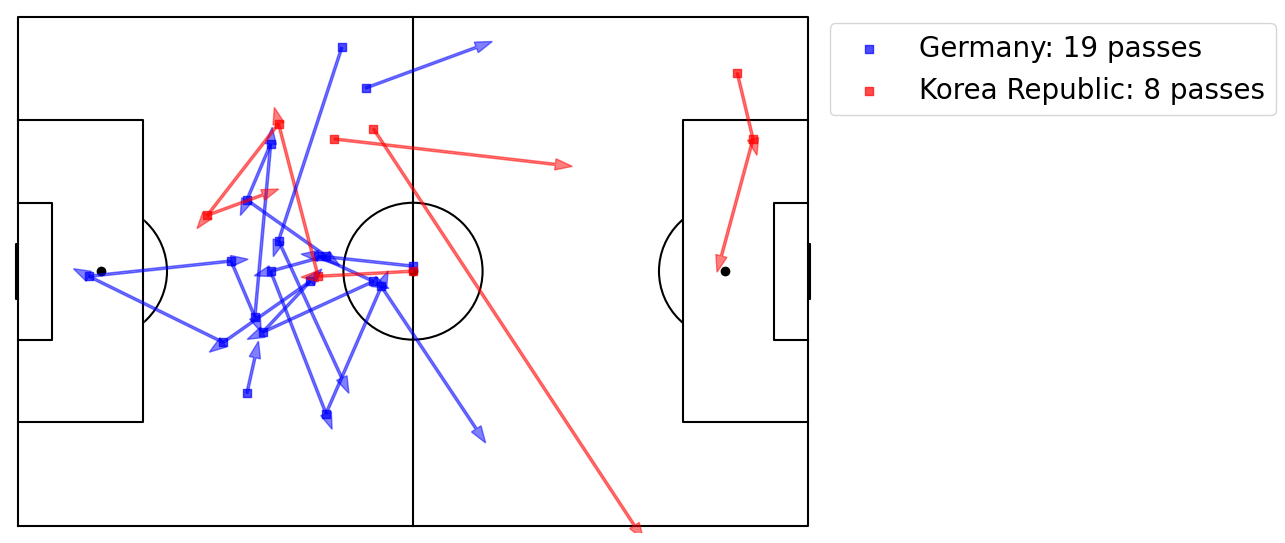

In [3]:
#위, 아래, 중간 코드는 생략 되었습니다. ( 결과물 출력 후 ipynb에서 삭제처리)
# 3 패스 시각화.ipynb에서 실행 해주세요.

match_id = 2057988 #원하는 경기의 match_id로 변경해보세요.
dataset_name = 'World_Cup'

start_time = 0  # 원하는 시작 시간을 입력하세요.(분)
end_time = 1  # 원하는 종료 시간을 입력하세요.(분)

draw_pitch('white', 'black')
#경기장을 그려주는 코드 (인자1 = 배경색, 인자2 = 라인색)

plt.legend(fontsize=20, bbox_to_anchor=(1, 1))
#plt.savefig('img/pass_arrow.png', bbox_inches='tight')
plt.show()

<br>
<br>

#### 4. 공격 이벤트 시퀀스 시각화
#### 어떤 방법으로 공격을 진행했는지 한눈에 볼 수 있습니다.
* <span style="color:skyblue">**"4 공격 이벤트 스퀀스 시각화.ipynb"**</span> 파일을 통해 원하는 경기 공격 진행 내용을 확인해보세요.
    * 분석을 희망하는 match_id, 리그 이름을 넣어주셔야 합니다. ("2 분석 희망 데이터 찾기.ipynb" 참고)
    * 원하는 공격 스퀀스_ㅇ를 찾아서 입력해주셔야 합니다.

* 공격 스퀀스란?: 공을 스틸 당하거나, 패스 미스, 전/후반 종료, 라인 아웃 등의 상황이 일어나지 않고 지속적으로 공격권이 유지되는 시간을 하나의 스퀀스로 봅니다.
* 아래 예시 코드와 출력물은 World_Cup의 match_id = 2058017 프랑스 vs 크로아티아 경기의 132 seq_id의 공격 경로 입니다.

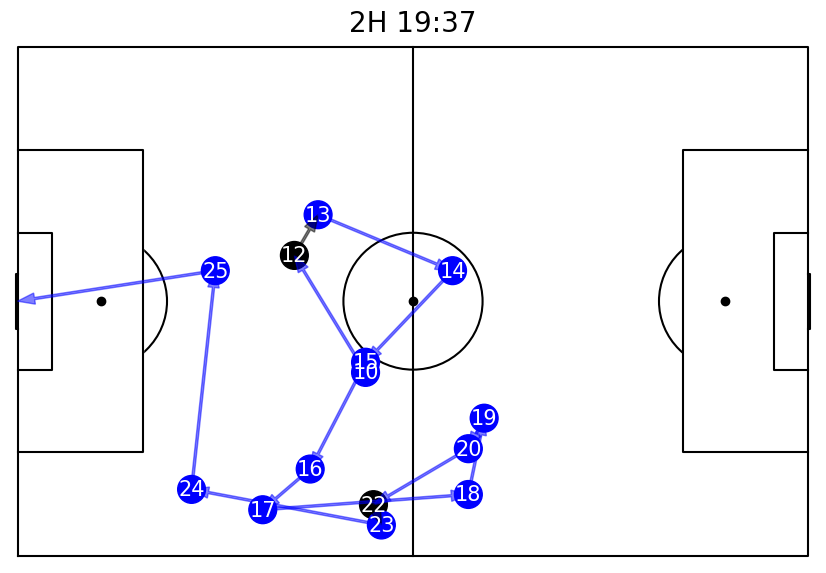

,display_time,team_name,player_name,event_type,sub_event_type,tags
1010,2H 19:08,France,B. Matuidi,Pass,Simple pass,[Accurate]
1011,2H 19:10,France,A. Griezmann,Duel,Ground attacking duel,"[Neutral, Accurate]"
1012,2H 19:10,Croatia,M. Brozović,Duel,Ground defending duel,"[Neutral, Accurate]"
1013,2H 19:12,France,A. Griezmann,Pass,Simple pass,[Accurate]
1014,2H 19:14,France,S. N'Zonzi,Pass,Simple pass,[Accurate]
1015,2H 19:16,France,P. Pogba,Pass,Simple pass,[Accurate]
1016,2H 19:20,France,L. Hernández,Pass,Simple pass,[Accurate]
1017,2H 19:21,France,B. Matuidi,Pass,Simple pass,[Accurate]
1018,2H 19:24,France,P. Pogba,Pass,Simple pass,[Accurate]
1019,2H 19:25,France,S. N'Zonzi,Pass,Simple pass,[Accurate]


In [11]:
#위에 코드는 생략 되었습니다. ( 결과물 출력 후 ipynb에서 삭제처리)
# 4 공격 이벤트 스퀀스 시각화.ipynb에서 실행 해주세요.
seq_id = 132
first_idx = seq_records.at[seq_id, 'first_idx']
last_idx = seq_records.at[seq_id, 'last_idx']
visualize_sequence(match_events, first_idx, last_idx)

<br>
<br>

#### 5. 경기별 슈팅 차트와 xG 시각화
#### 분석 팀의 슈팅이 얼마나 위협적인 슈팅인지 머신러닝을 통해 확인해보세요.
* <span style="color:skyblue">**"5 슈팅 xG 시각화.ipynb"**</span> 파일을 통해 원하는 경기의 슈팅 차트와 xG를 확인해보세요.
    * 분석을 희망하는 match_id를 넣어주세요 ("2 분석 희망 데이터 찾기.ipynb" 참고)
    * xG는 슈팅별 골로 이어질 수 있는 확률에 대한 기대 값입니다.
    * Logistic Regression 모델로 로지스틱 회귀 분석을 수행하였습니다.
        * scr폴더의 xgml.py는 class101_파이형인간의 코드를 활용 제작하였습니다.

<br>

* git의 용량 문제로 기본 data는 월드컵 데이터만 포함됩니다.
    * 따라서 7개 대회 데이터 학습과 비교했을 때 성능이 떨어질 수 있습니다.
    * <span style="color:skyblue">"1 데이터 준비.ipynb"</span>를 통해 7개 대회 데이터를 사용하세요.
    
<br>

* 아래 예시 코드와 출력물은 World_Cup의 match_id = 2057987 대한민국 vs 멕시코 경기의 슈팅차트입니다.

In [2]:
#위에 코드는 생략 되었습니다. ( 결과물 출력 후 ipynb에서 삭제처리)
# 5 슈팅 xG 시각화.ipynb에서 실행 해주세요.
team1_xg = team1_shots['xg'].sum().round(2)
team2_xg = team2_shots['xg'].sum().round(2)
title = f"{team1_name} - {team2_name} (xG: {team1_xg} - {team2_xg})"
fig = go.Figure(data=[shot_trace, team1_goal_trace, team2_goal_trace], layout=get_pitch_layout(title))
fig.show()


<p float="center">
  <img src="img/xg.png" width="50%" />
</p>

#### 7개 대회 슈팅 데이터에 대한 로지스틱 회귀 모델 학습 시각화

<p float="center">
  <img src="img/ml1.png" width="50%" />
  <img src="img/ml2.png" width="50%" /> 
</p>

<br>
선수별 xG 분석 차트 업데이트 예정....
* coming soon

<br>
<br>

----

#### 스포스 데이터 사이언스 학계 전망

* 의료, 자연어, 컴퓨터 비젼에 대한 연구는 수 많은 인재들이 연구를 진행 중이지만, 스포츠 데이터 사이언스 분야에 대한 관심은 높지 않다.
* 하지만 축구 선수들의 몸 값은 천문학적이며 축구 업계는 여전히 정량적인 방법의 분석을 사용합니다.
* 따라서 스포츠 데이터 사이언스 분야의 잠재적 가치는 크다.
<br>

* 취미가 직업이 될 수도 있다는 생각을 하면서,
* 우선은 취미라도 축구 데이터를 활용하여 분석을 해보면 좋을 것 같습니다.

<br>

#### 시각화 데이터 활용 방법
* 공격 스퀀스 분석을 통해 팀의 공격 경향성을 분석하는 방법
    - https://dl.acm.org/doi/pdf/10.1145/3219819.3219832 논문 참조
* 선수의 이벤트 액션과 득점 기여도에 관한 분석 방법
    - https://arxiv.org/pdf/1802.07127.pdf 논문참조

<br>
<br>

----
## Reference🙏
* class101 파이형인간님께서 오픈해주신 코드를 기반으로 작성되었습니다.
    1. data_utils.py
    2. plot_utils.py

## Developer
* 22102167 길민규